In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and Reading the data

df = pd.read_csv('instagram_reach.csv')
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
# Making a copy of dataframe

df1 = df.copy()
df1.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df1 = df1[['Followers', 'Time since posted', 'Likes']]
df1.head()

,Followers,Time since posted,Likes
0,1600,11 hours,139
1,880,2 hours,23
2,255,2 hours,25
3,340,3 hours,49
4,304,3 hours,30


In [5]:
# Structure of data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Followers            100 non-null int64
Time since posted    100 non-null object
Likes                100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [6]:
# Descriptive Statistics of data

df1.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [7]:
# Extracting the numeric part from Time Since posted varibale

df1['Time_since_posted'] = df1['Time since posted'].map(lambda x : x.rstrip('hours'))
df1.head()

,Followers,Time since posted,Likes,Time_since_posted
0,1600,11 hours,139,11
1,880,2 hours,23,2
2,255,2 hours,25,2
3,340,3 hours,49,3
4,304,3 hours,30,3


In [8]:
# Converting a varibale to integer

df1['Time_since_posted'] = df1['Time_since_posted'].astype('int')

# Rearranging the columns
df1 = df1[['Followers', 'Time_since_posted', 'Likes']]

# Structure of new data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Followers            100 non-null int64
Time_since_posted    100 non-null int32
Likes                100 non-null int64
dtypes: int32(1), int64(2)
memory usage: 2.1 KB


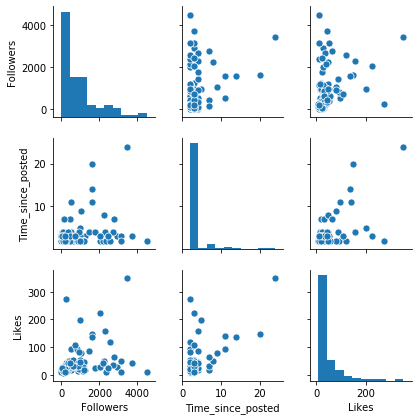

In [9]:
# Linear Relationship of Independent varibales with Dependent variable

sns.pairplot( data = df1, size = 2, plot_kws = {'s' : 50})

                   Followers  Time_since_posted
Followers           1.000000           0.251154
Time_since_posted   0.251154           1.000000


(2.0, 0.0)

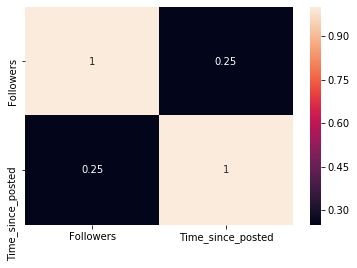

In [10]:
# Correlation matrix of independent variables

print(df1.iloc[:,:-1].corr())
ax = sns.heatmap(df1.iloc[:,:-1].corr(), annot = True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

In [11]:
# Splitting the data into X & Y

X = df1.values[:,:-1]
Y = df1.values[:,-1]
Y = Y.astype('int')

In [12]:
# Splitting the X & Y into train test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [13]:
# Building Model 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [14]:
# Evaluate the Model

from sklearn.metrics import mean_squared_error
print('MSE :', round(mean_squared_error(Y_test, Y_pred),2))

MSE : 494.06


In [15]:
# Saving the model

from pickle import dump

filename = 'model.h5'
dump(lr, open(filename, 'wb'))

In [16]:
# Loading the model

from pickle import load

x = load(open('model.h5', 'rb'))

In [17]:
# Predicting for 300 followers and 10 hours of Time_Since_posted

a = x.predict([[300,10]])
print('300 Followers and 10 hours of Time since posted we get',int(round(a[0])), 'Likes')

300 Followers and 10 hours of Time since posted we get 102 Likes
